# Importerer nødvendige biblioteker

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Indlæsning af data

In [4]:
df = pd.read_csv('../data/Data_Train.csv')
df.sample(5)

,Airline,Date_of_Journey,Source,Dep_Time,Destination,Class,Price
10498,Jet Airways,6/05/2019,Kolkata,16:30,Banglore,0,9663
4708,Multiple carriers,9/05/2019,Delhi,07:05,Cochin,0,8310
8461,Jet Airways,06/03/2019,Banglore,05:45,New Delhi,0,16736
57,Vistara,6/03/2019,Chennai,07:05,Kolkata,0,7414
4158,Air India,01/03/2019,Banglore,22:00,New Delhi,0,21130


Vi har importeret dataene og lavet en hurtig gennemgang for at få et overblik over datasættet. Nu går vi videre med at forberede og rense dataene, så de er klar til analyse.

# Rensning af data

In [7]:
# Tjekker for manglende værdier
print("Tjekker for manglende værdier:")
print(df.isnull().sum())

# Tjekker for NaN-værdier
print("Tjekker for NaN-værdier:")
print(df.isna().sum())

# Tjekker for datatyper
print("Tjekker for datatyper:")
print(df.info())

# Tjekker for duplikater
print("Tjekker for duplikater:")
print(df.duplicated().sum()) 

Tjekker for manglende værdier:
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64
Tjekker for NaN-værdier:
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64
Tjekker for datatyper:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Destination      10683 non-null  object
 5   Class            10683 non-null  int64 
 6   Price            10683 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 584.4+ KB
None
Tjekker for duplikater:
2001


In [8]:
# Finder alle rækker der er identiske med mindst én anden (keep=False viser ALLE forekomster)
fulde_duplikater = df[df.duplicated(keep=False)]

# Udskriver samlet antal duplikerede rækker
print("Antal fuldstændige duplikatrækker (inkl. kopier):", fulde_duplikater.shape[0])

# Viser et par eksempler på de duplikerede rækker
print("\nEksempler på duplikerede rækker:")
print(fulde_duplikater.head())

# Tæller hvor mange af disse er faktiske kopier (ikke første forekomst)
antal_egentlige_duplikater = df[df.duplicated(keep=False)].duplicated().sum()
print("\nAntal gentagelser (egentlige duplikater):", antal_egentlige_duplikater)

# Tjekker hvor mange unikke rækker er det der gentages?
unikke_rækker = fulde_duplikater.drop_duplicates()
print("Antal unikke rækker blandt de duplikerede:", unikke_rækker.shape[0])

# Eksempel 1: Række 2
print("\nForekomster af række 2:")
print(df[df.eq(df.loc[2]).all(axis=1)])

# Eksempel 2: Række 6
print("\nForekomster af række 6:")
print(df[df.eq(df.loc[6]).all(axis=1)])

Antal fuldstændige duplikatrækker (inkl. kopier): 3192

Eksempler på duplikerede rækker:
        Airline Date_of_Journey    Source Dep_Time Destination  Class  Price
2   Jet Airways       9/06/2019     Delhi    09:25      Cochin      0  13882
6   Jet Airways      12/03/2019  Banglore    18:55   New Delhi      0  11087
7   Jet Airways      01/03/2019  Banglore    08:00   New Delhi      0  22270
13  Jet Airways       9/05/2019   Kolkata    21:10    Banglore      0   9663
17  Jet Airways      12/06/2019     Delhi    14:00      Cochin      0  10262

Antal gentagelser (egentlige duplikater): 2001
Antal unikke rækker blandt de duplikerede: 1191

Forekomster af række 2:
          Airline Date_of_Journey Source Dep_Time Destination  Class  Price
2     Jet Airways       9/06/2019  Delhi    09:25      Cochin      0  13882
5375  Jet Airways       9/06/2019  Delhi    09:25      Cochin      0  13882

Forekomster af række 6:
          Airline Date_of_Journey    Source Dep_Time Destination  Class  Pr

In [9]:
# Fjerner duplikaterne fra datasættet for at sikre, at kun unikke observationer er tilbage
df = df.drop_duplicates()
print("Datasættets nye størrelse efter sletning af duplikater:", df.shape)

Datasættets nye størrelse efter sletning af duplikater: (8682, 7)


Datasættet indeholder ikke nogen manglende værdier, hverken som NaN eller null. Datatyperne består hovedsageligt af tekst (object), som vi vil konvertere til string, samt nogle numeriske kolonner, der er defineret som heltal (int64) og decimaltal (float64).

Datasættet indeholder en del duplikater, hvor nogle rækker er præcist ens. Selvom duplikater kan være nyttige i nogle analyser, har vi valgt at fjerne dem her. Det gør vi for at sikre, at hver række i datasættet bidrager unikt til vores analyser og modeller. Ved at fjerne duplikaterne undgår vi, at nogle observationer får for stor vægt i analysen, hvilket kan påvirke resultaterne. Dette er vigtigt, både for lineær regression og andre statistiske analyser og maskinlæringsmodeller.

Nu opdeles datasættet i to separate dataframes: en med numeriske værdier og en med nominelle (kategoriske) data, da det bliver lettere at arbejde med disse typer.

In [11]:
# Fjerner 'Dep_Time' kolonnen, da den ikke er relevant for analysen
df.drop(['Dep_Time'], axis=1, inplace=True) 

In [12]:
# Konverterer 'Date_of_Journey' til datetime format for at gøre videre analyse nemmere
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y') 

# Opretter en ny kolonne 'Journey_month' som indeholder måneden fra 'Date_of_Journey'
df['Journey_month'] = df['Date_of_Journey'].dt.month
df['Journey_month'] = df['Journey_month'].astype('int64')  # Sikrer datatypen som int64 for konsistens

In [13]:
# Opdaterer den eksisterende 'Class' kolonne baseret på værdier i 'Airline' da den gamle kun havde 0 værdier
df['Class'] = df['Airline'].apply(lambda x: 'Business' if 'Business' in x else ('Premium economy' if 'Premium economy' in x else 'Standard'))

In [14]:
# Udfører one-hot encoding på de kategoriske kolonner for at gøre dem numeriske og lettere at regressere på
dfNumeric = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination', 'Date_of_Journey'], dtype=pd.Int64Dtype())

# Viser 5 tilfældige rækker af det transformerede datasæt
dfNumeric.sample(5)

,Class,Price,Journey_month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Date_of_Journey_2019-06-01 00:00:00,Date_of_Journey_2019-06-03 00:00:00,Date_of_Journey_2019-06-06 00:00:00,Date_of_Journey_2019-06-09 00:00:00,Date_of_Journey_2019-06-12 00:00:00,Date_of_Journey_2019-06-15 00:00:00,Date_of_Journey_2019-06-18 00:00:00,Date_of_Journey_2019-06-21 00:00:00,Date_of_Journey_2019-06-24 00:00:00,Date_of_Journey_2019-06-27 00:00:00
6009,Standard,7144,5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8884,Standard,4804,5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3178,Standard,3873,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3555,Standard,3573,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4815,Standard,8938,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Konverterer alle 'object'-kolonner til 'string'-type
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('string')

# Tjekker datatyperne efter konvertering
df.dtypes

Airline            string[python]
Date_of_Journey    datetime64[ns]
Source             string[python]
Destination        string[python]
Class              string[python]
Price                       int64
Journey_month               int64
dtype: object

# Dataudforskning

In [17]:
df.describe()

,Date_of_Journey,Price,Journey_month
count,8682,8682.000000,8682.000000
mean,2019-05-04 12:20:24.049758208,8434.731283,4.695001
min,2019-03-01 00:00:00,1759.000000,3.000000
25%,2019-03-27 00:00:00,4823.000000,3.000000
50%,2019-05-15 00:00:00,7229.000000,5.000000
75%,2019-06-06 00:00:00,11410.000000,6.000000
max,2019-06-27 00:00:00,79512.000000,6.000000
std,NaN,4605.337734,1.164916


Date_of_Journey: Datoerne Strækker sig fra 1. marts til 27. juni 2019, med median omkring midt i maj.

Price: Priserne varierer fra 1.759 til 79.512, med en gennemsnitlig pris på ca. 8.435.

Journey_month: Rejserne fordeler sig over månederne marts (3) til juni (6), med flest rejser omkring april–maj (gennemsnit 4,7).

Der er stor variation i priserne, hvilket sandsynligvis skyldes forskelle i sæson, rejseklasse og flyselskab.

Standardafvigelsen vises som NaN for datoer, da det ikke er beregnbar, da det er en datetime-værdi

In [19]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Class', 'Price',
       'Journey_month'],
      dtype='object')

Vi kan se, at dataene allerede er forholdsvis standardiserede, men lad os konvertere kolonnenavnene til at bruge "x-y" i stedet for "x_y" for at demonstrere muligheden for at forberede data.

In [21]:
import gc

dfStan = df.copy()

# Skifter kolonnenavne til store bogstaver og erstatter "_" med "-"
dfStan.columns = [col.upper().replace('_', '-') for col in dfStan.columns]

print(dfStan.columns)

del dfStan

# Kører garbage collection for at rydde op i hukommelsen
gc.collect()

Index(['AIRLINE', 'DATE-OF-JOURNEY', 'SOURCE', 'DESTINATION', 'CLASS', 'PRICE',
       'JOURNEY-MONTH'],
      dtype='object')


0

Som nævnt foretager vi ikke en permanent ændring af kolonnenavnene i datasættet, men viser blot, hvordan det kan gøres. 

Vi vælger dog at konvertere kolonnenavnene til små bogstaver, da det giver et pænere, mere ensartet og læsevenligt datasæt.

In [23]:
# Skifter kolonnenavne til små bogstaver 
df.columns = [col.lower() for col in df.columns]

print(df.columns)

Index(['airline', 'date_of_journey', 'source', 'destination', 'class', 'price',
       'journey_month'],
      dtype='object')


For at lave en grundlæggende visualisering og udforske fordelingen af prisdataene, laver vi et histogram.

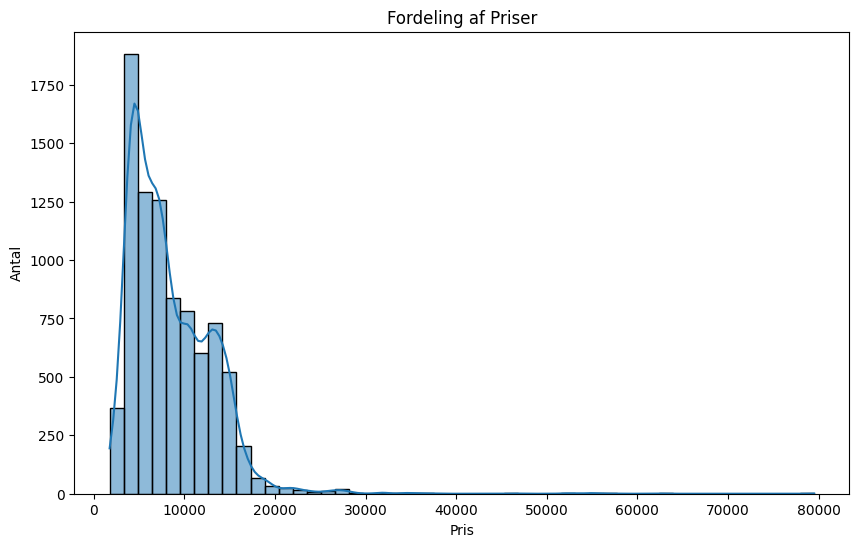

Skævhed (Skewness): 2.24303381701942
Kurtosis: 17.0167794296372
Fordelingen er højreskæv (positiv skævhed).
Fordelingen er spidsere end en normalfordeling (høj kurtosis).


In [25]:
from scipy.stats import skew, kurtosis  

# Plotter histogram med KDE for prisfordeling
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Fordeling af Priser')
plt.ylabel('Antal')
plt.xlabel('Pris')
plt.show()

# Beregning af skævhed og kurtosis
skewness = skew(df['price'].dropna())  # Fjerner NaN-værdier før beregning
kurt = kurtosis(df['price'].dropna())  # Fjerner NaN-værdier før beregning

# Udskriv resultaterne
print(f"Skævhed (Skewness): {skewness}")
print(f"Kurtosis: {kurt}")

# Tolkning af skævhed og kurtosis:
if skewness > 0:
    print("Fordelingen er højreskæv (positiv skævhed).")
elif skewness < 0:
    print("Fordelingen er venstreskæv (negativ skævhed).")
else:
    print("Fordelingen er symmetrisk.")

if kurt > 3:
    print("Fordelingen er spidsere end en normalfordeling (høj kurtosis).")
elif kurt < 3:
    print("Fordelingen er fladere end en normalfordeling (lav kurtosis).")
else:
    print("Fordelingen har samme spidshed som en normalfordeling.")


Fordelingen er højreskæv (positiv skævhed), hvilket betyder, at der er flere lavere værdier, og den højre hale af fordelingen er længere.

Fordelingen har også høj kurtosis, hvilket indikerer, at dataene er spidsere end en normalfordeling, og der er flere ekstreme værdier (outliers) end vi ville forvente i en normalfordeling. Dette tyder på, at vores data kan indeholde nogle ekstreme observationer, som vi vil fjerne ved hjælp af z-score teknikken for at forbedre modellens præcision.